In [1]:
# read the file and plot raw data over time
import matplotlib.pyplot as plt
import numpy as np
import csv

#data_path = "dashboard/recordings/emg_data_20230821-142649.csv"
data_path = "dashboard/recordings/08-21-2023-15:39:04.csv"

In [2]:
def preprocess_data(data_path):
    # read the data from the CSV file
    # sample:
    # time,ch0,ch1,ch2
    # 0.186,4095,150,179

    # make sure that the range of channel values is 0-4095

    # read the data
    data = []
    with open(data_path, newline='') as csvfile:
        data = list(csv.reader(csvfile))
        # skip the first row
        data = data[1:]
        for line in data:
            time = float(line[0])
            # convert time from milliseconds to seconds
            time = time / 1000
            ch0 = int(line[1])
            ch1 = int(line[2])
            ch2 = int(line[3])
            # clip the values to 0-4095
            ch0 = max(0, min(ch0, 4095))
            ch1 = max(0, min(ch1, 4095))
            ch2 = max(0, min(ch2, 4095))

            # write that data back to the list
            line[0] = time
            line[1] = ch0
            line[2] = ch1
            line[3] = ch2

    # convert the data to a numpy array
    data = np.array(data)
    return data

preprocessed_data = preprocess_data(data_path)


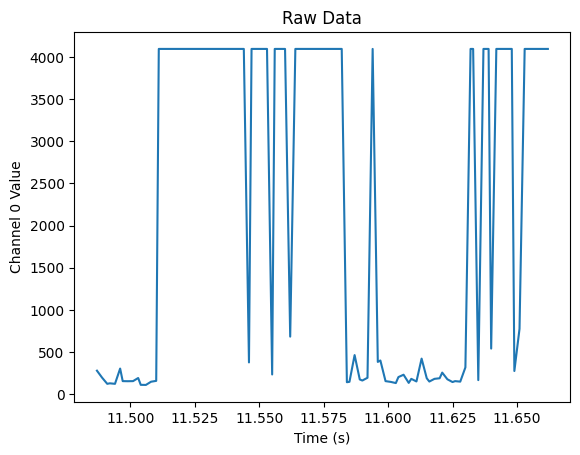

In [9]:
# given preprocessed data, plot the raw data over time
def plot_raw_data(data, channel=0):
    # based on the channel, get the correct column
    channel_data = data[:, channel+1]
    # get the time data
    time_data = data[:, 0]
    # plot the data
    plt.plot(time_data, channel_data)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel " + str(channel) + " Value")
    plt.title("Raw Data")
    plt.show()

plot_raw_data(preprocessed_data[3500:3600])

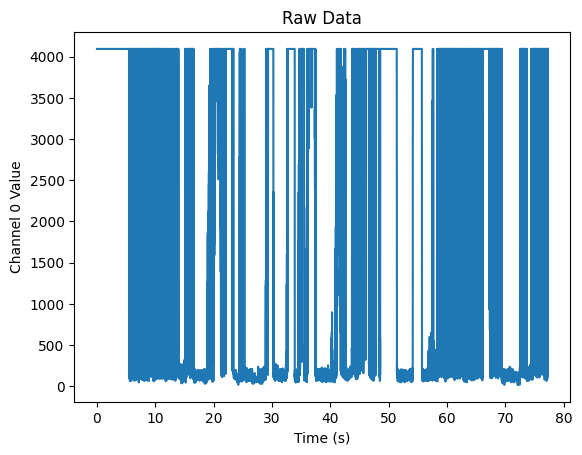

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


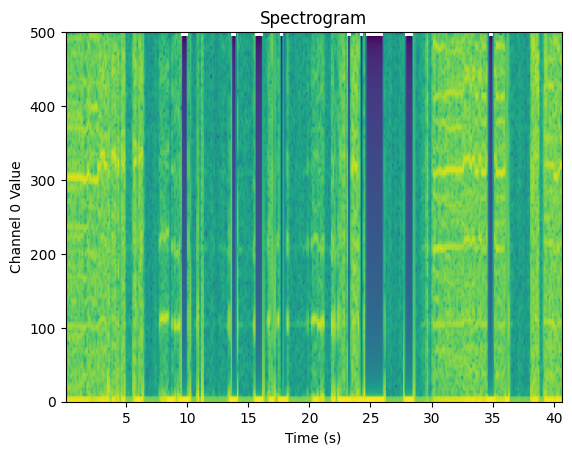

In [16]:
# given preprocessed data, plot the spectrogram
def plot_spectrogram(data, channel=0):
    # based on the channel, get the correct column
    channel_data = data[:, channel+1]
    # get the time data
    time_data = data[:, 0]
    # plot the data
    plt.specgram(channel_data, Fs=1000)
    plt.xlabel("Time (s)")
    plt.ylabel("Channel " + str(channel) + " Value")
    plt.title("Spectrogram")
    plt.show()


d = preprocessed_data
plot_raw_data(d, channel=0)
plot_spectrogram(d, channel=0)


In [24]:
import numpy as np
from scipy.fft import fft
from scipy.signal import find_peaks

def identify_top_frequencies_for_channel(data, channel_index, sampling_rate):
    timestamps = data[:, 0]
    channel_data = data[:, channel_index]

    segment_length = int(sampling_rate)
    num_segments = len(channel_data) // segment_length
    
    top_frequencies = []

    for i in range(num_segments):
        segment = channel_data[i * segment_length: (i + 1) * segment_length]
        fft_data = fft(segment)
        
        # Calculate frequencies corresponding to FFT bins
        frequencies = np.fft.fftfreq(len(fft_data), d=1/sampling_rate)
        
        # Find peaks in the amplitude spectrum
        peaks, _ = find_peaks(np.abs(fft_data)[:len(fft_data)//2])
        
        # Get the top 3 frequencies with highest amplitudes
        top_indices = peaks[np.argsort(np.abs(fft_data[peaks]))[-3:]]
        top_frequencies.append(frequencies[top_indices])

    return np.array(top_frequencies)

# Example usage
sampling_rate = 1000  # Hz
data = d

channel_index = 1  # Index of ch0 in the data (0-based)
top_frequencies = identify_top_frequencies_for_channel(data, channel_index, sampling_rate)
print("Top 3 frequencies for ch0 for each 500 ms:")
print(top_frequencies)


Top 3 frequencies for ch0 for each 500 ms:
[[371. 237. 304.]
 [307. 302. 304.]
 [317. 400. 300.]
 [322. 320. 337.]
 [329. 320.   2.]
 [  6. 325.   4.]
 [331.   7.   4.]
 [  9. 106. 111.]
 [104. 115. 112.]
 [  7. 105. 101.]
 [  9.   6.   3.]
 [ 24.  17.  10.]
 [480.   8. 208.]
 [  9.   6.   4.]
 [ 32.  96.  19.]
 [ 10.   8.   3.]
 [  7.   5.   3.]
 [  7. 109.   4.]
 [109. 104.   8.]
 [208.   3. 105.]
 [  4. 110. 104.]
 [  7. 102. 106.]
 [103.  10.   6.]
 [314. 316. 320.]
 [  7.   5.   2.]
 [ 15.  10.   5.]
 [ 42.  32.  18.]
 [ 10.   7.   4.]
 [  7.   5.   3.]
 [406. 211. 208.]
 [312. 206. 208.]
 [420. 210. 315.]
 [219. 329. 314.]
 [330. 311.   2.]
 [415.   4. 311.]
 [413. 207. 310.]
 [ 15.  10.   6.]
 [ 42.  12.   5.]
 [476. 469.   7.]
 [429. 107. 322.]]


In [23]:
note_frequency = {
    "C0": 16.35,
    "C#0/Db0": 17.32,
    "D0": 18.35,
    "D#0/Eb0": 19.45,
    "E0": 20.60,
    "F0": 21.83,
    "F#0/Gb0": 23.12,
    "G0": 24.50,
    "G#0/Ab0": 25.96,
    "A0": 27.50,
    "A#0/Bb0": 29.14,
    "B0": 30.87,
    "C1": 32.70,
    "C#1/Db1": 34.65,
    "D1": 36.71,
    "D#1/Eb1": 38.89,
    "E1": 41.20,
    "F1": 43.65,
    "F#1/Gb1": 46.25,
    "G1": 49.00,
    "G#1/Ab1": 51.91,
    "A1": 55.00,
    "A#1/Bb1": 58.27,
    "B1": 61.74,
    "C2": 65.41,
    "C#2/Db2": 69.30,
    "D2": 73.42,
    "D#2/Eb2": 77.78,
    "E2": 82.41,
    "F2": 87.31,
    "F#2/Gb2": 92.50,
    "G2": 98.00,
    "G#2/Ab2": 103.83,
    "A2": 110.00,
    "A#2/Bb2": 116.54,
    "B2": 123.47,
    "C3": 130.81,
    "C#3/Db3": 138.59,
    "D3": 146.83,
    "D#3/Eb3": 155.56,
    "E3": 164.81,
    "F3": 174.61,
    "F#3/Gb3": 185.00,
    "G3": 196.00,
    "G#3/Ab3": 207.65,
    "A3": 220.00,
    "A#3/Bb3": 233.08,
    "B3": 246.94,
    "C4": 261.63,
    "C#4/Db4": 277.18,
    "D4": 293.66,
    "D#4/Eb4": 311.13,
    "E4": 329.63,
    "F4": 349.23,
    "F#4/Gb4": 369.99,
    "G4": 392.00,
    "G#4/Ab4": 415.30,
    "A4": 440.00,
    "A#4/Bb4": 466.16,
    "B4": 493.88,
    "C5": 523.25,
    "C#5/Db5": 554.37,
    "D5": 587.33,
    "D#5/Eb5": 622.25,
    "E5": 659.25,
    "F5": 698.46,
    "F#5/Gb5": 739.99,
    "G5": 783.99,
    "G#5/Ab5": 830.61,
    "A5": 880.00,
    "A#5/Bb5": 932.33,
    "B5": 987.77,
    "C6": 1046.50,
    "C#6/Db6": 1108.73,
    "D6": 1174.66,
    "D#6/Eb6": 1244.51,
    "E6": 1318.51,
    "F6": 1396.91,
    "F#6/Gb6": 1479.98,
    "G6": 1567.98,
    "G#6/Ab6": 1661.22,
    "A6": 1760.00,
    "A#6/Bb6": 1864.66,
    "B6": 1975.53,
    "C7": 2093.00,
    "C#7/Db7": 2217.46,
    "D7": 2349.32,
    "D#7/Eb7": 2489.02,
    "E7": 2637.02,
    "F7": 2793.83,
    "F#7/Gb7": 2959.96,
    "G7": 3135.96,
    "G#7/Ab7": 3322.44,
    "A7": 3520.00,
    "A#7/Bb7": 3729.31,
    "B7": 3951.07,
    "C8": 4186.01,
    "C#8/Db8": 4434.92,
    "D8": 4698.63,
    "D#8/Eb8": 4978.03,
    "E8": 5274.04,
    "F8": 5587.65,
    "F#8/Gb8": 5919.91,
    "G8": 6271.93,
    "G#8/Ab8": 6644.88,
    "A8": 7040.00,
    "A#8/Bb8": 7458.62,
    "B8": 7902.13
}


In [16]:
# put top frequencies into a list
"""
[[371. 237. 304.]
 [307. 302. 304.]
 [317. 400. 300.]
 [322. 320. 337.]
 [329. 320.   2.]
 [  6. 325.   4.]
 [331.   7.   4.]
 [  9. 106. 111.]
 [104. 115. 112.]
 [  7. 105. 101.]
 [  9.   6.   3.]
 [ 24.  17.  10.]
 [480.   8. 208.]
 [  9.   6.   4.]
 [ 32.  96.  19.]
 [ 10.   8.   3.]
 [  7.   5.   3.]
 [  7. 109.   4.]
 [109. 104.   8.]
 [208.   3. 105.]
 [  4. 110. 104.]
 [  7. 102. 106.]
 [103.  10.   6.]
 [314. 316. 320.]
 [  7.   5.   2.]
 [ 15.  10.   5.]
 [ 42.  32.  18.]
 [ 10.   7.   4.]
 [  7.   5.   3.]
 [406. 211. 208.]
 [312. 206. 208.]
 [420. 210. 315.]
 [219. 329. 314.]
 [330. 311.   2.]
 [415.   4. 311.]
 [413. 207. 310.]
 [ 15.  10.   6.]
 [ 42.  12.   5.]
 [476. 469.   7.]
 [429. 107. 322.]]
"""

top_frequencies = [[371.0, 237.0, 304.0],
    [307.0, 302.0, 304.0],
    [317.0, 400.0, 300.0],
    [322.0, 320.0, 337.0],
    [329.0, 320.0, 2.0],
    [6.0, 325.0, 4.0],
    [331.0, 7.0, 4.0],
    [9.0, 106.0, 111.0],
    [104.0, 115.0, 112.0],
    [7.0, 105.0, 101.0],
    [9.0, 6.0, 3.0],
    [24.0, 17.0, 10.0],
    [480.0, 8.0, 208.0],
    [9.0, 6.0, 4.0],
    [32.0, 96.0, 19.0],
    [10.0, 8.0, 3.0],
    [7.0, 5.0, 3.0],
    [7.0, 109.0, 4.0],
    [109.0, 104.0, 8.0],
    [208.0, 3.0, 105.0],
    [4.0, 110.0, 104.0],
    [7.0, 102.0, 106.0],
    [103.0, 10.0, 6.0],
    [314.0, 316.0, 320.0],
    [7.0, 5.0, 2.0],
    [15.0, 10.0, 5.0],
    [42.0, 32.0, 18.0],
    [10.0, 7.0, 4.0],
    [7.0, 5.0, 3.0],
    [406.0, 211.0, 208.0],
    [312.0, 206.0, 208.0],
    [420.0, 210.0, 315.0],
    [219.0, 329.0, 314.0],
    [330.0, 311.0, 2.0],
    [415.0, 4.0, 311.0],
    [413.0, 207.0, 310.0],
    [15.0, 10.0, 6.0],
    [42.0, 12.0, 5.0],
    [476.0, 469.0, 7.0],
    [429.0, 107.0, 322.0]]


In [40]:
import sounddevice as sd

def play_frequencies(frequencies):
    # every 500 ms, play the top 3 frequencies
    for top3 in frequencies:
        # create a sin wave that is the sum of the top 3 frequencies
        # play the sin wave for 1000 ms
        t = np.linspace(0, 1, 1000, False)  # 1 second
        sin_wave = np.sin(2 * np.pi * top3[0] * t) + np.sin(2 * np.pi * top3[1] * t) + np.sin(2 * np.pi * top3[2] * t)
        # play the sin wave
        sampling_rate = 44100
        sd.play(sin_wave, sampling_rate)
        # wait for the sin wave to finish playing
        sd.wait()
        
play_frequencies(top_frequencies)



In [48]:
from pypiano import Piano
from mingus.containers import Note

p = Piano()

# Play a simple C-4 via audio
p.play("C-4")

# Play a mingus Note
note = Note("C-4")
p.play(note)

ModuleNotFoundError: No module named 'pypiano'